# Time Series data
Time series data is a type of data that is collected or recorded over a **sequence of time intervals**. In time series data, each data point is associated with a timestamp or a time period, indicating when the observation was made. This type of data is often used in various fields such as finance, economics, meteorology, signal processing, and more.

Key characteristics of time series data include:

Sequential Order: Time series data is inherently ordered by time. Observations are recorded at regular or irregular intervals, and the order of observations is important for analysis.

Temporal Dependencies: Time series data often exhibits temporal dependencies, meaning that the value of a data point at one time may depend on or be influenced by the values of previous data points.

Trends, Seasonality, and Patterns: Time series data may contain trends (long-term changes), seasonality (periodic fluctuations), and other patterns that can be identified and analyzed.

Noise and Randomness: Time series data can also contain noise and randomness, which may obscure underlying patterns or trends.

Examples of time series data include stock prices over time, temperature measurements recorded hourly or daily, daily sales data for a retail store, monthly unemployment rates, and so on.

Analyzing time series data often involves techniques such as time series decomposition, trend analysis, seasonality detection, forecasting, anomaly detection, and more. These analyses can provide valuable insights into underlying patterns, trends, and future behavior of the data.

# https://ca.finance.yahoo.com/

find Crude Oil price from 2001 to 2024 weekly --> save it on excel as CSV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("oil price.csv")
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,05-Feb-24,72.75,73.28,71.41,72.78,72.78,"350,843"
1,29-Jan-24,78.90,79.29,71.79,72.28,72.28,"2,069,364"
2,22-Jan-24,73.41,78.26,72.89,78.01,78.01,"1,687,703"
3,15-Jan-24,72.63,74.91,70.50,73.41,73.41,"1,314,632"
4,08-Jan-24,73.51,75.25,70.13,72.68,72.68,"1,885,747"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1206 non-null   object 
 1   Open         1206 non-null   float64
 2   High         1206 non-null   float64
 3   Low          1206 non-null   float64
 4   Close*       1206 non-null   float64
 5   Adj Close**  1206 non-null   float64
 6   Volume       1206 non-null   object 
dtypes: float64(5), object(2)
memory usage: 66.1+ KB


In [7]:
df.sample(12)
# 12 sample radomly from entire samples/data points

,Date,Open,High,Low,Close*,Adj Close**,Volume
1046,19-Jan-04,34.92,36.37,33.75,34.94,34.94,"433,812"
479,01-Dec-14,66.00,69.54,63.72,65.84,65.84,"1,671,445"
371,26-Dec-16,53.29,54.37,53.03,53.72,53.72,"1,231,129"
424,21-Dec-15,34.58,38.28,33.98,38.10,38.10,"1,180,874"
435,04-Oct-15,45.65,50.92,45.21,49.63,49.63,"2,342,090"
889,22-Jan-07,52.09,55.90,50.80,55.42,55.42,"1,144,990"
850,21-Oct-07,88.86,92.22,84.68,91.86,91.86,"1,470,547"
513,06-Apr-14,100.91,104.44,99.92,103.74,103.74,"1,363,177"
1037,22-Mar-04,38.09,38.09,34.75,35.73,35.73,"478,186"
872,20-May-07,64.95,66.38,63.82,65.20,65.20,"904,947"


In [8]:
df.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
1201,29-Jan-01,30.15,31.3,28.25,31.25,31.25,"361,646"
1202,22-Jan-01,31.95,32.7,28.64,29.78,29.78,"372,589"
1203,15-Jan-01,30.10,32.4,29.00,32.10,32.10,"229,617"
1204,08-Jan-01,28.20,30.2,26.90,30.05,30.05,"353,371"
1205,01-Jan-01,27.25,28.8,26.60,28.00,28.00,"257,184"


In [9]:
df.describe()

,Open,High,Low,Close*,Adj Close**
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,64.709138,66.900075,62.195381,64.714113,64.714113
std,25.371434,25.940741,24.764374,25.304173,25.304173
min,16.840000,18.260000,-40.320000,16.940000,16.940000
25%,45.605000,47.717500,43.650000,45.732500,45.732500
50%,62.950000,64.725000,60.635000,62.910000,62.910000
75%,84.567500,86.927500,80.707500,83.977500,83.977500
max,144.690000,147.270000,139.170000,145.290000,145.290000


In [10]:
# for drowing plot , first step we should date(object)----> time format
df["Date"] = df["Date"].apply(pd.to_datetime)

In [11]:
df.info()
#  Date ----> datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1206 non-null   datetime64[ns]
 1   Open         1206 non-null   float64       
 2   High         1206 non-null   float64       
 3   Low          1206 non-null   float64       
 4   Close*       1206 non-null   float64       
 5   Adj Close**  1206 non-null   float64       
 6   Volume       1206 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 66.1+ KB


In [12]:
# next step set date as index
df.set_index("Date" , inplace=True)

In [13]:
df.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2024-02-05,72.75,73.28,71.41,72.78,72.78,"350,843"
2024-01-29,78.90,79.29,71.79,72.28,72.28,"2,069,364"
2024-01-22,73.41,78.26,72.89,78.01,78.01,"1,687,703"
2024-01-15,72.63,74.91,70.50,73.41,73.41,"1,314,632"
2024-01-08,73.51,75.25,70.13,72.68,72.68,"1,885,747"


<Axes: xlabel='Date'>

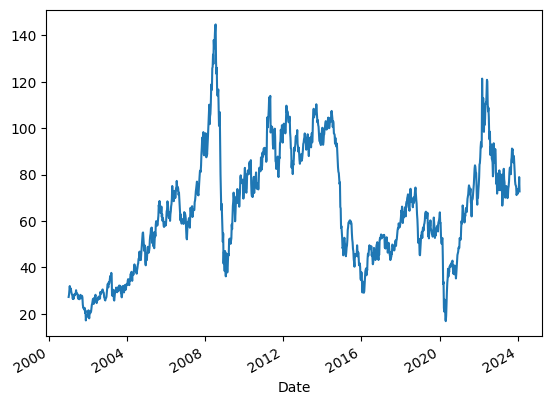

In [14]:
df["Open"].plot()

<Axes: xlabel='Date'>

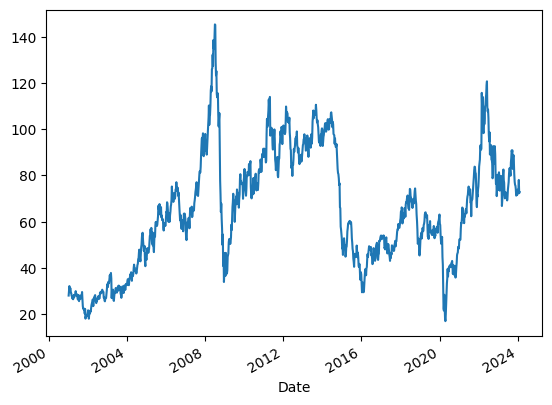

In [15]:
df["Close*"].plot()

In [19]:
# average according to year by year
df.resample(rule= "y").mean()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2001-12-31,26.047736,26.967925,24.824717,26.014340,26.014340,NaN
2002-12-31,26.124615,27.153654,25.228462,26.382885,26.382885,NaN
2003-12-31,31.010577,32.249423,29.716731,31.123077,31.123077,NaN
2004-12-31,41.372885,42.902308,39.846154,41.655962,41.655962,NaN
2005-12-31,56.445000,58.577115,54.580769,56.751154,56.751154,NaN
2006-12-31,66.551346,68.315000,64.313269,66.383077,66.383077,NaN
2007-12-31,72.470566,74.850943,70.301321,73.241509,73.241509,NaN
2008-12-31,100.271538,104.706923,94.658077,99.036731,99.036731,NaN
2009-12-31,61.894038,65.059038,58.925000,62.549615,62.549615,NaN


In [20]:
# according to mounth by mounth
df.resample(rule= "m").mean()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2001-01-31,29.5300,31.0800,27.8780,30.2360,30.2360,NaN
2001-02-28,30.0025,30.3500,28.5000,29.2625,29.2625,NaN
2001-03-31,27.4875,28.2200,26.3375,27.0500,27.0500,NaN
2001-04-30,27.6460,28.6600,26.6840,27.8440,27.8440,NaN
2001-05-31,29.0000,29.5225,27.6950,28.6925,28.6925,NaN
...,...,...,...,...,...,...
2023-10-31,87.3580,88.8160,82.3180,85.0560,85.0560,NaN
2023-11-30,77.3100,79.9575,73.6975,75.6675,75.6675,NaN
2023-12-31,72.7425,74.7600,69.6000,71.9675,71.9675,NaN


In [24]:
# season by season
df.resample(rule= "q").mean()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2001-03-31,29.046923,29.975385,27.595385,28.956154,28.956154,NaN
2001-06-30,28.213846,28.906923,26.984615,27.998462,27.998462,NaN
2001-09-30,26.558571,27.523571,25.488571,26.654286,26.654286,NaN
2001-12-31,20.332308,21.423077,19.179231,20.399231,20.399231,NaN
2002-03-31,21.486667,22.511667,20.672500,21.924167,21.924167,NaN
...,...,...,...,...,...,...
2023-03-31,76.511538,79.329231,72.730000,76.032308,76.032308,NaN
2023-06-30,74.663077,76.169231,70.754615,73.612308,73.612308,NaN
2023-09-30,81.514615,84.399231,79.646154,82.974615,82.974615,NaN


<Axes: xlabel='Date'>

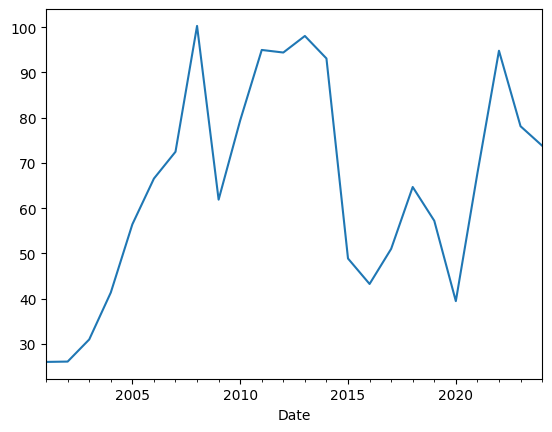

In [21]:
# take the "open" column from yearly and plot it
df.resample(rule= "y").mean()["Open"].plot()

<Axes: xlabel='Date'>

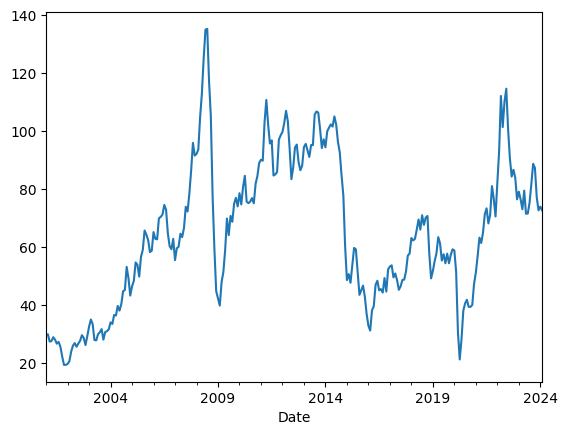

In [22]:
df.resample(rule= "m").mean()["Open"].plot()

<Axes: xlabel='Date'>

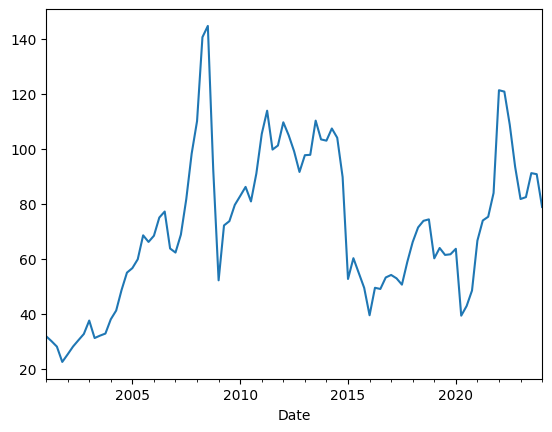

In [23]:
# seasonal ----> q
df.resample(rule= "q").max()["Open"].plot()

<Axes: xlabel='Date'>

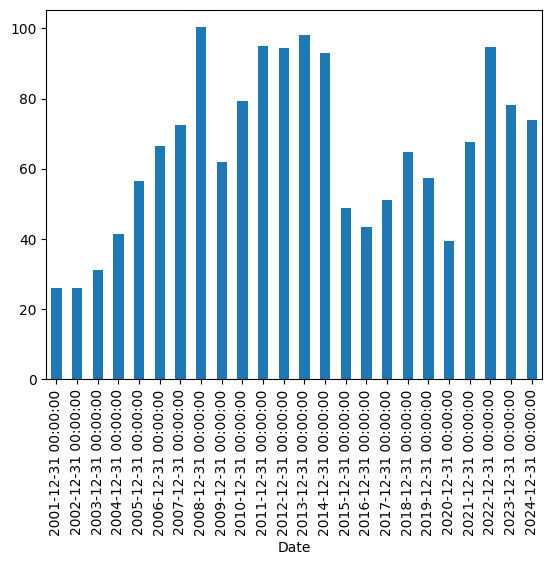

In [25]:
df.resample(rule= "y").mean()["Open"].plot(kind ="bar")